In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import math
import torch
import tensorflow as tf
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from torch import optim 
from sklearn.metrics import accuracy_score ,  confusion_matrix , ConfusionMatrixDisplay

data= loadmat('/content/Matlab_cancer.mat')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
data_x = data['x']
data_y = data['t']
data_x = np.transpose(data_x)
np.transpose(data_y)
data_y  = data_y[0]
# print(data_x.shape)
# print(data_y.shape)

train_x , test_x ,train_y , test_y= train_test_split(data_x,data_y,train_size = 0.8,shuffle=True,random_state=0)
train_x , val_x ,train_y , val_y= train_test_split(train_x,train_y,train_size = 0.8,shuffle=True,random_state=0)
# train_x = tf.convert_to_tensor(train_x)
print(train_x.shape,test_x.shape,val_x.shape)
print(train_y.shape,test_y.shape,val_y.shape)

(137, 100) (44, 100) (35, 100)
(137,) (44,) (35,)


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # self.flatten = nn.Flatten(start_dim=1, end_dim=99)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(100, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        # x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        logits = torch.sigmoid(logits)
        return logits

In [ ]:
train_x = torch.from_numpy(train_x.astype(np.float32))
test_x = torch.from_numpy(test_x.astype(np.float32))
train_y = torch.from_numpy(train_y.astype(np.float32))
test_y = torch.from_numpy(test_y.astype(np.float32))

train_y = train_y.view(train_y.shape[0], 1)
test_y = test_y.view(test_y.shape[0], 1)

In [ ]:
print(train_x.shape,test_x.shape,val_x.shape)
print(train_y.shape,test_y.shape,val_y.shape)

torch.Size([137, 100]) torch.Size([44, 100]) (35, 100)
torch.Size([137, 1]) torch.Size([44, 1]) (35,)


In [ ]:
train_dataloader = DataLoader(train_x, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_x, batch_size=4, shuffle=True)

In [ ]:
model = NeuralNetwork()
num_epochs = 20
criterion = nn.BCELoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
train_accuracy= []
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(train_x)
    loss = criterion(y_pred, train_y)
    y_predicted_cls = y_pred.round()
    acc = y_predicted_cls.eq(train_y).sum() / float(train_y.shape[0])
    
    train_accuracy.append(acc)
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, accuracy = {acc}')

epoch: 1, loss = 0.7008, accuracy = 0.55474454164505
epoch: 2, loss = 0.5879, accuracy = 0.7883211970329285
epoch: 3, loss = 0.5122, accuracy = 0.8175182342529297
epoch: 4, loss = 0.4481, accuracy = 0.8394160866737366
epoch: 5, loss = 0.3967, accuracy = 0.8686131238937378
epoch: 6, loss = 0.3558, accuracy = 0.8832116723060608
epoch: 7, loss = 0.3260, accuracy = 0.8832116723060608
epoch: 8, loss = 0.3065, accuracy = 0.8832116723060608
epoch: 9, loss = 0.2937, accuracy = 0.8686131238937378
epoch: 10, loss = 0.2868, accuracy = 0.8540145754814148
epoch: 11, loss = 0.2817, accuracy = 0.8686131238937378
epoch: 12, loss = 0.2786, accuracy = 0.8686131238937378
epoch: 13, loss = 0.2750, accuracy = 0.8759124279022217
epoch: 14, loss = 0.2709, accuracy = 0.8759124279022217
epoch: 15, loss = 0.2657, accuracy = 0.8832116723060608
epoch: 16, loss = 0.2593, accuracy = 0.8832116723060608
epoch: 17, loss = 0.2525, accuracy = 0.8905109763145447
epoch: 18, loss = 0.2446, accuracy = 0.9051094651222229
epo

In [ ]:
with torch.no_grad():
    y_predicted = model(test_x)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(test_y).sum() / float(test_y.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9091


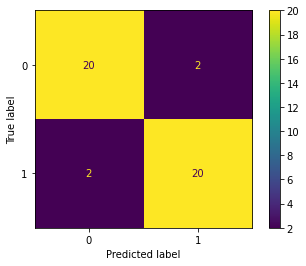

In [ ]:
cm = confusion_matrix(test_y, y_predicted.round())
disp_rbf = ConfusionMatrixDisplay(cm)
disp_rbf.plot()
plt.show()

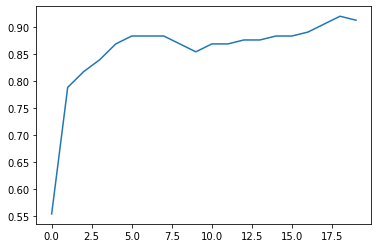

In [ ]:
plt.plot(train_accuracy)